In [1]:
from vnstock import *
from function import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


##### VN100

In [1]:
import requests

url = "https://www.hsx.vn/Modules/Listed/Web/StockIndex/188803177?_search=false&nd=1676169121809&rows=2147483647&page=1&sidx=id&sord=desc"

payload={}
headers = {
  'Accept': 'application/json, text/javascript, */*; q=0.01',
  'Accept-Language': 'en-US,en;q=0.9',
  'Connection': 'keep-alive',
  'Cookie': 'ASP.NET_SessionId=pv5aylwinwlvuoxvulhw1520; TS016df111=01343ddb6a732d11705aa16e6e99545c4235ff00bd07f7414bbc3a74d35868c1b58d4d36d60f85294e5c2c0db6f52781f5f778f0760b8aa544f0c272e536799b269ccfe30c; TS0d710d04027=085cef26a9ab2000b2c8a3c680e48f06c29eb8c9070f02b7a50cb2e04312e353b8eb7c255dd5353608174c63a611300074005a71c9eb2a42d1ac3507bed71e1a6aa3bb449c5f75e1e51cbffcd3da2a4a7903957b541b1a138abd510fc6f9d8f6; TS0d710d04027=085cef26a9ab20006d24140c1a5e12ef3aaf09d94d0ad3fef504082ec7d0bafa3060dd87135e6e1208289d1fd7113000e733bb8f855b5e33367dc2862e425f27981f58be49c7f724ac2bd6205b1f6297d9223c5766bbd7a41a3b7008f8647f21',
  'Referer': 'https://www.hsx.vn/Modules/Listed/Web/StockIndexView/188803177',
  'Sec-Fetch-Dest': 'empty',
  'Sec-Fetch-Mode': 'cors',
  'Sec-Fetch-Site': 'same-origin',
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36 Edg/110.0.1587.41',
  'X-KL-Ajax-Request': 'Ajax_Request',
  'X-Requested-With': 'XMLHttpRequest',
  'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "Microsoft Edge";v="110"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"Windows"'
}

response = requests.request("GET", url, headers=headers, data=payload)
a = response.json()
ticket=[]
# VN 100
for i in range(100):
    ticket.append(a["rows"][i]["cell"][2][:3])

##### VN30

In [3]:
ticket = ['CII','CTD','CTG','DHG','DPM','EIB','FPT','GAS','GMD','HDB','HPG','MBB','MSN','MWG','NVL','PNJ','REE','ROS','SAB','SBT','SSI','STB','TCB','VCB','VHM','VIC','VJC','VNM','VPB','VRE']

frame = []
for i in ticket:
    a = stock_historical_data(symbol=i, 
                            start_date="2013-01-01", 
                            end_date='2023-02-11')    
    a["ticker"] = i
    frame.append(a)
    
q = pd.concat(frame)
close= q.pivot_table(values="Close", columns="ticker", index="TradingDate")
high= q.pivot_table(values="High", columns="ticker", index="TradingDate")
low= q.pivot_table(values="Low", columns="ticker", index="TradingDate")
open= q.pivot_table(values="Open", columns="ticker", index="TradingDate")


### Markowitz model

In [5]:
w = marko_weights(close)
returns=close.pct_change()

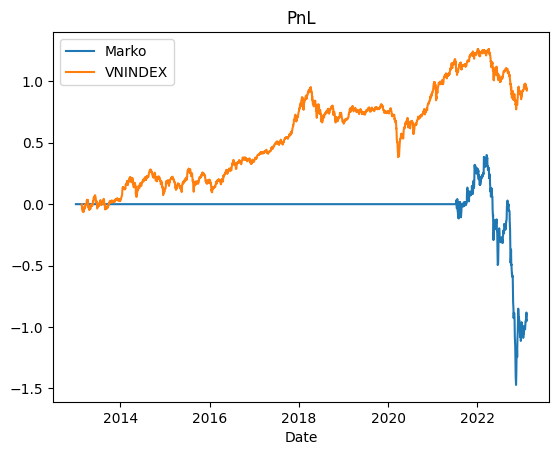

In [6]:
a = Simresult(w,returns=returns)
a.plot_pnl("Marko")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

### alpha = ts_delta(close,5)

In [57]:
lag = 5
close_t5=close-close.shift(lag)

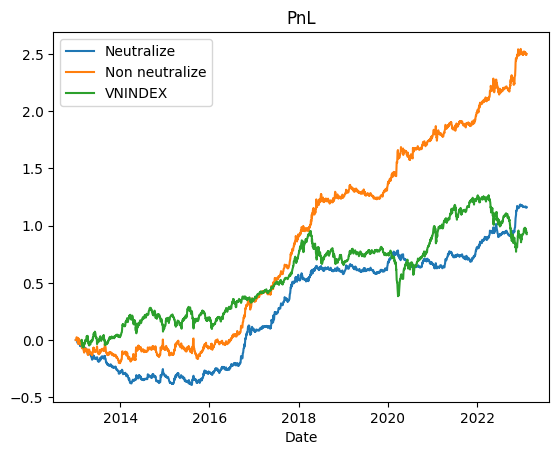

In [58]:
returns = close.pct_change()
w  = weights(close_t5, neutrali=1)
neu=Simresult(weights=w,returns=returns)
neu.plot_pnl(type="Neutralize")

w1  = weights(close_t5, neutrali=0)
non_neu=Simresult(weights=w1,returns=returns)
non_neu.plot_pnl(type="Non neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [59]:
neu.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.116131,1.026037,0.581226,0.458632,199.803249


In [60]:
neu.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.289115,-2.886706,0.628499,-1.957878,-460.008984
2014,-0.027787,-0.257894,0.603191,-0.055352,-46.065815
2015,0.025631,0.238350,0.585701,0.049861,43.760729
2016,0.372940,3.047322,0.581179,2.441085,641.695733
2017,0.467491,3.511050,0.542485,3.259341,861.758345
2018,0.032162,0.279907,0.577621,0.066049,55.680814
2019,0.094289,1.042111,0.622486,0.405582,151.471136
2020,-0.009300,-0.083557,0.577321,-0.010605,-16.109737
2021,0.139454,1.403362,0.563189,0.698326,247.614661


In [61]:
non_neu.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.250125,1.453026,0.594381,0.942582,420.81521


In [62]:
non_neu.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.201883,-1.312268,0.633236,-0.740952,-318.811946
2014,0.116070,0.680709,0.611300,0.296616,189.873894
2015,0.022471,0.146641,0.596954,0.028451,37.643256
2016,0.403735,2.814558,0.548013,2.415812,736.725821
2017,0.581298,4.198096,0.518273,4.446033,1121.606869
2018,0.329990,1.630178,0.582216,1.227280,566.783493
2019,0.124867,1.159499,0.625107,0.518224,199.753455
2020,0.420794,2.003896,0.587899,1.695347,715.758765
2021,0.210838,1.288363,0.609508,0.757745,345.914824


### alpha = rank(ts_delta(close,5))

In [53]:
lag = 5
close_t5=close-close.shift(lag)
alpha2 = (close_t5.rank(axis=1,ascending=True))
w =weights(alpha2)
w1 =weights(alpha2,neutrali=1)

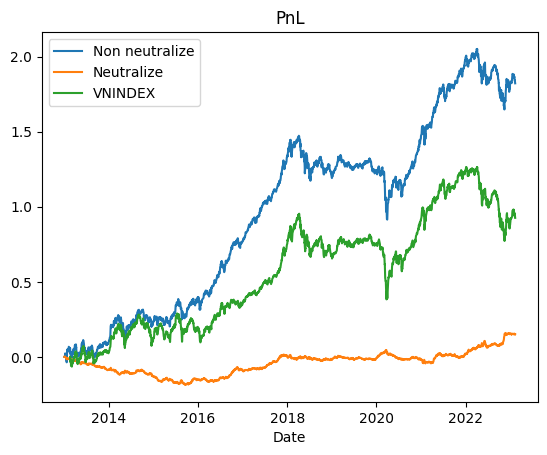

In [54]:
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [55]:
a.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,0.098148,0.655005,0.292286,0.379560,335.793193
2014,0.135643,0.820606,0.298899,0.552804,453.808941
2015,0.165757,1.108252,0.286465,0.843022,578.629396
2016,0.379027,2.735312,0.281287,3.175174,1347.476339
2017,0.564450,5.141917,0.257363,7.614903,2193.201720
2018,-0.120729,-0.524377,0.267524,-0.352263,-451.281448
2019,0.034445,0.328787,0.279527,0.115416,123.226632
2020,0.225970,0.983369,0.281627,0.880856,802.374576
2021,0.529096,2.484710,0.278822,3.422786,1897.614975


In [56]:
b.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.086085,-2.291637,0.292286,-1.243675,-294.524827
2014,-0.047165,-1.245361,0.298840,-0.494749,-157.826253
2015,-0.020703,-0.534740,0.286465,-0.143756,-72.270922
2016,0.061846,1.726176,0.281207,0.809521,219.930935
2017,0.095956,2.839155,0.257273,1.733914,372.972472
2018,-0.025229,-0.606115,0.267456,-0.186158,-94.330413
2019,0.013387,0.507839,0.279527,0.111137,47.892131
2020,-0.011161,-0.292264,0.281627,-0.058181,-39.629535
2021,0.035970,0.825228,0.278822,0.296402,129.007784


### alpha = rank(ts_stddev(close,20)/(ts_sum(close,20)/20))

In [42]:
alpha3 = close.rolling(20).std()/close.rolling(20).mean()
alpha3 = alpha3.rank(ascending=True,axis=1)

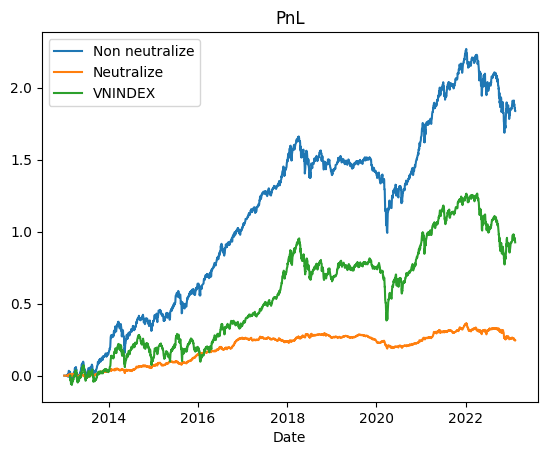

In [43]:
w =weights(alpha3, neutrali=0)
w1 =weights(alpha3,neutrali=1)

a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [44]:
a.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,0.159390,0.962246,0.066895,1.485319,2382.688265
2014,0.219267,1.155682,0.072026,2.016412,3044.260053
2015,0.266818,1.616758,0.077119,3.007264,3459.814805
2016,0.400385,2.602420,0.076353,5.959399,5243.849852
2017,0.448664,3.693097,0.074534,9.060961,6019.591292
2018,-0.063020,-0.247593,0.087089,-0.210618,-723.629022
2019,-0.004045,-0.035525,0.089858,-0.007537,-45.016800
2020,0.243070,0.926794,0.073255,1.688225,3318.137737
2021,0.605009,2.626713,0.080396,7.205717,7525.392959


### alpha = close-ts_min(low,14))/(ts_max(high,14)-ts_min(low,14))*100

In [49]:
alpha4 = (close-low.rolling(14).min())/(high.rolling(14).max()-low.rolling(14).min())*100
alpha4 = alpha4.rank(axis=1,ascending=True)

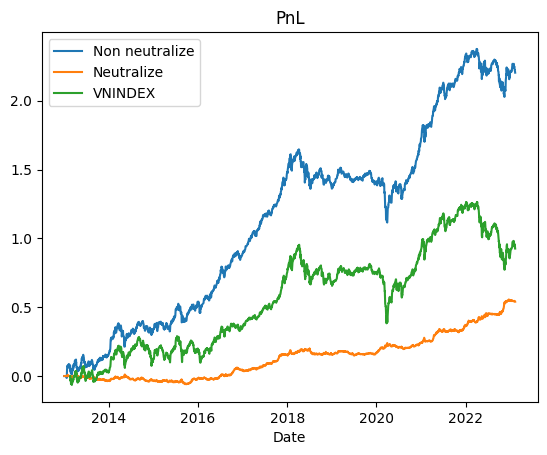

In [50]:
w =weights(alpha4, neutrali=0)
w1 =weights(alpha4,neutrali=1)

a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [51]:
a.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,0.157931,1.065741,0.248705,0.849264,635.012518
2014,0.181835,1.083061,0.279163,0.874103,651.358117
2015,0.204554,1.343846,0.264122,1.182639,774.470754
2016,0.355064,2.525390,0.256273,2.972558,1385.491202
2017,0.584456,5.236343,0.247106,8.053081,2365.200352
2018,-0.089944,-0.394881,0.268120,-0.228712,-335.461613
2019,0.035229,0.340195,0.257583,0.125811,136.766563
2020,0.308277,1.359877,0.275286,1.439057,1119.841978
2021,0.614284,2.913980,0.258452,4.492431,2376.783623


In [52]:
b.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.033741,-0.996455,0.248705,-0.367025,-135.667176
2014,-0.001541,-0.040228,0.279105,-0.002989,-5.519455
2015,0.018094,0.484489,0.264122,0.126810,68.507822
2016,0.059514,1.629879,0.256300,0.785397,232.202749
2017,0.113121,3.101791,0.247051,2.098897,457.885746
2018,0.001951,0.039525,0.268015,0.003372,7.279265
2019,0.014171,0.523171,0.257583,0.122710,55.014139
2020,0.071146,1.633838,0.275286,0.830601,258.443948
2021,0.121158,2.444815,0.258452,1.673910,468.783461


### close-ts_product(close,5)^0.2

In [45]:
alpha5 = close-np.sqrt(close.rolling(2).apply(np.prod))
alpha5=alpha5.rank(axis=1,ascending=True)

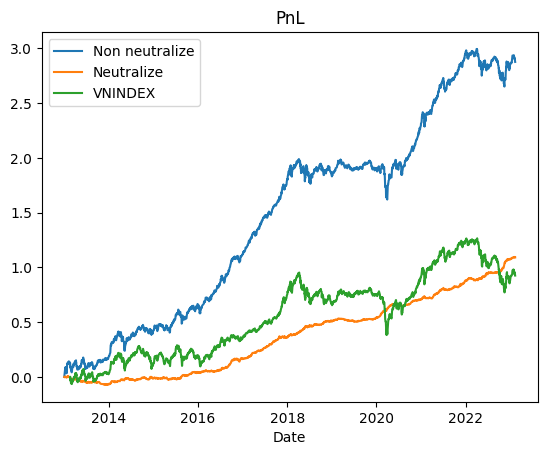

In [46]:
w =weights(alpha5, neutrali=0)
w1 =weights(alpha5,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [47]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.287557,1.572742,0.603881,1.085285,476.18172


In [48]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.109086,2.797792,0.603866,1.189129,180.645367


### alpha6
a = ts_sum(open>close,20)/ts_sum(open<close,20);

b = ts_sum(open>close,250)/ts_sum(open<close,250);

rank(a/b)

In [66]:
a=(1*(open>close).rolling(20).sum())/(1*(open<close).rolling(20).sum())
b=(1*(open>close).rolling(250).sum())/(1*(open<close).rolling(250).sum())
alpha6=(a/b).rank(ascending=True,axis=1)

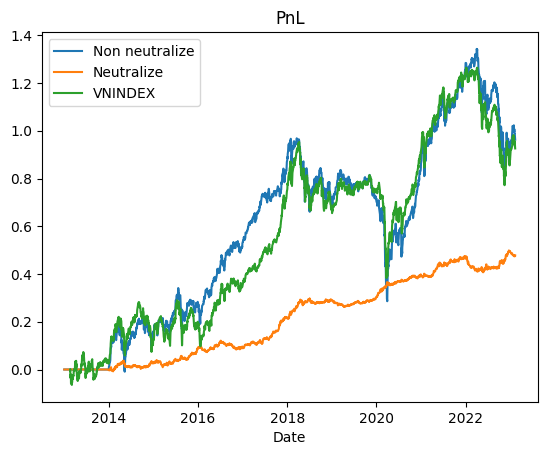

In [67]:
w =weights(alpha6, neutrali=0)
w1 =-1*weights(alpha6,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [64]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.047773,1.362982,0.121174,0.855811,394.253204


In [65]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.096246,0.526361,0.121195,0.469064,794.141065
